# Week 5



## The plan for today

We continue exploring data and learning about dataviz. The lecture today has 4 parts.
* In part 1, there is more lecturing.
* In part 2, we talk about exploring data with two variables - we read a bit more.
* In part 3, it's a short one about logarithmic plots.
* And finally, in part 4, we have fun with linear regression.

Ok. Now it's time to get started.


## Part 1: More lecturing on dataviz

So now we start learning more about the theory of visualization, digging into data encodings and representations.

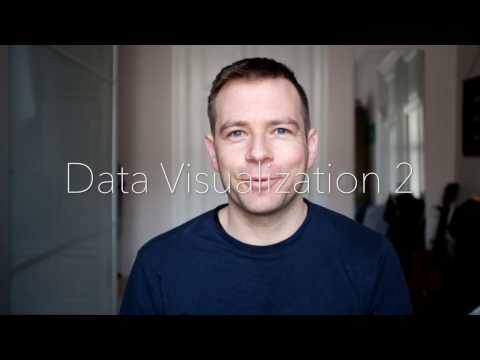

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("zE6Nr8trdrw",width=800, height=450)

> Excercise: Some questions for the video
>
> * Mention 10 examples of ways we can encode data
> * Are all encoding created equally? Why not?
> * Explain in your own words: What is the problem with pie-charts?
> * Mention three encodings that are difficult for the human eye to parse? Can you find an example of a visualization online that uses one of those three?
> * What is a "Choropleth"? What does the ancient Greek root of that word "χώρος" mean?

Lengtht of bars, sizes of dots...


**Bonus video**: Just to provide another perspective on data visualization (which covers many of the topics I've discussed over the past few weeks but from new angles), below is a great talk about data visualization by David McCandless. This one is optional, but recommended.

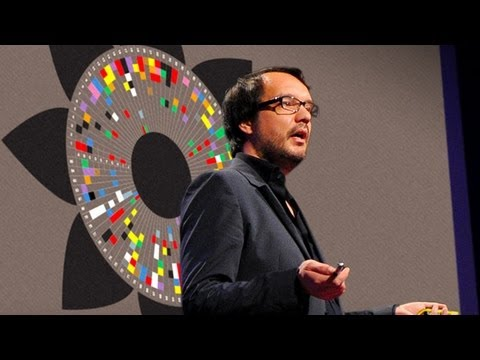

In [2]:
# David McCandless TED talk (this one is optional)
YouTubeVideo("5Zg-C8AAIGg",width=800, height=450)

## Part 2: Exploratory data visualzation, two variables  

I told you how I love the Data Analysis with Open Source Tools book. This time, we'll read Chapter 3, which is about visualizing data with two variables. 

*Reading*: [DAOST Chapter 3](https://cn.inside.dtu.dk/cnnet/filesharing/download/3e8a79e2-e0e6-4a76-bc56-304c906c166d) up to *Graphical Analysis and Presentation Graphics* on page 68 in the PDF.

And now a few exercises to reflect on the text:

*Exercises:* DAOST chapter 3

 > * Looking at Fig 3-1, Janert writes "the data itself shows clearly that the amount of random noise in the data is small". What do you think his argument is?
> * Can you think of a real-world example of a multivariate relationship like the one in Fig 3-3 (lower right panel)?
> * What are the two methods Janert metions for smoothing noisy data? Can you think of other ones?
> * What is problematic about using straight lines to fit the data in Fig 3-5? (Something similar is actually the topic of a Nature article from 2004 get it [here](https://github.com/suneman/socialdataanalysis2018/blob/master/files/regrunners.pdf). And an extra [link](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3366/pdf/imm3366.pdf) on this topic for the students who know Danish).
> * What are residuals? Why is it a good idea to plot the residuals of your fit?
> * Explain in your own words the point of the smooth tube in figure 3-7.
> * What kind of relationships will a semi-log plot help you discover?
> * What kind of functions will loglog plots help you see?
> * What the h#ll is banking and what part of our visual system does it use to help us see patterns? What are potential problems with banking?
> * I think figure 3-14 makes an important point about linear fits that is rarely made. What is it? 
> * Summarize the discussion of Graphical Analysis and Presentation Graphics on pp. 68-69 in your own words.

There is a very clear systematic pattern in the figure 3.1, and it is very easy to draw a nice bouncing curve when joining the points, indicating that there is little randomness in each point.

A multivariate relationship like the one in figure 3.3 could be the muscular growth of male and female children - at young ages both genders are somewhat equally strong, but when puberty comes males tend to grow muscles a lot faster.

Alternative approeaches for smoothing can be performed by (exponential) moving averages of the points

Straight lines are far from the "true" patterin in the data, these will also give an incorrect evaluation of predicitons when extrapolating data points, as women e.g will be extremely fast runners in no time.

3.7 smoooth tubes helt identify the variance in your smoothness?

semi log plots reveeal exponential behaviours

loglog is used for power functions? not sure.

banking is just zooming?

3-14 makes a good point but i am not sure what it is - linear regression is not a tool for visualising data but rather trying to predict it? 

## Part 3: Logarithmic plots

Ok. Let's briefly talk about logarithms and logarithimic plots (if you take my networks class in the fall semester you'll se lots of loglog plots since they're important for understanding a key property of networks).

*Exercise*: Logarithms and plots

> * First, we'll simply create a version of [this plot](https://raw.githubusercontent.com/suneman/socialdataanalysis2019/master/files/categories.png) from Lecture 1, where you display the $y$-axis on log-scale.
> * Let's also try a loglog plot. Inspired by [this article](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0183110) I would expect that especially theft could be characterized by a power law distribution also in san francisco. Let's see if I'm right. 
>   - Step 1: Divide San Francisco into a grid roughly $100m \times 100m$. You can, for example use numpy to do this, I would call `np.histogram2d`, and searching the internet, it seems that there are also [ways to do this in pandas](https://stackoverflow.com/questions/39254704/pandas-group-bins-of-data-per-longitude-latitude). The earth isn't flat,so lat lon aren't really squares, but if setting up a true grid of distances seems like too much work, it's OK to just use fractions of lat/lon as bin-edges [even though those aren't completely square](https://gis.stackexchange.com/questions/173926/whats-wrong-in-using-latitude-and-longitude-as-x-and-y-on-a-cartesian-space). 
>   - Step 2: Count the number of thefts occurring within each grid-square (use all data for all time).
>   - Step 3: Tally the counts. Count the number of squares with $k=0$ thefts. We call this $N(0)$. Next, count the number of grids with one crime to get $N(k=1)$. Keep going like this all the way up to $k=C_{max}$, where $C_{max}$ is the highest count of crimes you find in any grid space. 
>     * *Extra tip*: If you want all the details on binning for loglog axes, you can check out [Lecture 2, exercise 3](https://nbviewer.jupyter.org/github/suneman/socialgraphs2019/blob/master/lectures/Week2.ipynb) in my social graphs course.
>   - Step 4: Plot the distribution of $k+1$ vs $N(k)$ on linear axes.
>   - Step 5: Plot the distribution of $k+1$ vs $N(k)$ on loglog axes.
>   - Step 6: Answer the question: Was Sune correct in assuming that there is a power-law distribution of theft?

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
policedata = pd.read_csv(r'C:\Users\Bruger\Desktop\LargeDataFiles\Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
import datetime
policedata['DateTime'] = policedata['Date'] + ' ' + policedata['Time']

policedata['DateTime'] = pd.to_datetime(policedata['DateTime'] , format="%m/%d/%Y %H:%M") 

fcdata = policedata[policedata['Category'].isin(list(focuscrimes))]

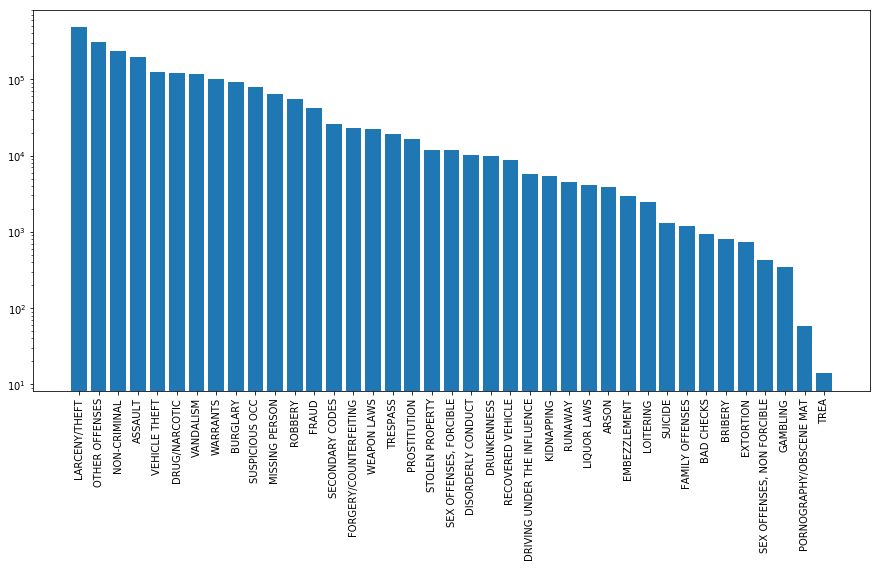

In [11]:
crimeoccurences = policedata.Category.value_counts()
plt.figure(figsize=(15,7))
plt.bar(*zip(*crimeoccurences.items()), log = "True")
plt.xticks(rotation='vertical')

plt.show()

In [43]:
policedata["Category"]

0             NON-CRIMINAL
1                  ASSAULT
2           SUSPICIOUS OCC
3                  ASSAULT
4           OTHER OFFENSES
5                  SUICIDE
6             NON-CRIMINAL
7            VEHICLE THEFT
8                    ARSON
9                  ASSAULT
10                 ASSAULT
11                   FRAUD
12          SUSPICIOUS OCC
13            NON-CRIMINAL
14            NON-CRIMINAL
15            NON-CRIMINAL
16                 ASSAULT
17           VEHICLE THEFT
18                 ASSAULT
19           VEHICLE THEFT
20         SECONDARY CODES
21                 ASSAULT
22                 ASSAULT
23          OTHER OFFENSES
24           LARCENY/THEFT
25           LARCENY/THEFT
26            NON-CRIMINAL
27           VEHICLE THEFT
28                 ASSAULT
29           LARCENY/THEFT
                ...       
2214994      DRUG/NARCOTIC
2214995       NON-CRIMINAL
2214996       NON-CRIMINAL
2214997      LARCENY/THEFT
2214998            ASSAULT
2214999            ASSAULT
2

In [46]:
thefts = policedata[policedata["Category"].isin(["VEHICLE THEFT", "LARCENY/THEFT"])]
step = 0.00091
to_bin = lambda x: np.floor(x / step) * step
thefts["latbin"] = thefts.Y.map(to_bin)
thefts["lonbin"] = thefts.X.map(to_bin)
groups = thefts.groupby(("latbin", "lonbin"))

C:\Users\Bruger\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Bruger\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Bruger\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  


In [71]:
# Count crimes in each grid squre
groups.count().IncidntNum

latbin    lonbin    
37.70767  -122.48600      63
          -122.46689       1
          -122.46598      26
          -122.46416       5
          -122.46325       8
          -122.46234       8
          -122.46143       8
          -122.46052       9
          -122.45961      11
          -122.45870       2
          -122.45779       6
          -122.45506       1
          -122.45415      20
          -122.45324       3
          -122.45233       3
          -122.45051       9
          -122.44778       2
          -122.44687       5
          -122.44505       2
          -122.44323       3
          -122.44232       2
          -122.44141       2
          -122.43504       7
          -122.43413       9
          -122.43049      13
          -122.42958       7
          -122.42776       4
          -122.42685       2
          -122.42594       5
          -122.42139      12
                        ... 
37.80686  -122.41229      14
          -122.41138     441
          -122.41047  

In [91]:
Nk = np.zeros(max(groups.count().IncidntNum))
values = groups.count().IncidntNum.values
listvalues = list(values)


for i in range (len(Nk)):
    Nk[i] = listvalues.count(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097


3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766


5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450


7272
7273
7274
7275
7276
7277
7278
7279
7280
7281
7282
7283
7284
7285
7286
7287
7288
7289
7290
7291
7292
7293
7294
7295
7296
7297
7298
7299
7300
7301
7302
7303
7304
7305
7306
7307
7308
7309
7310
7311
7312
7313
7314
7315
7316
7317
7318
7319
7320
7321
7322
7323
7324
7325
7326
7327
7328
7329
7330
7331
7332
7333
7334
7335
7336
7337
7338
7339
7340
7341
7342
7343
7344
7345
7346
7347
7348
7349
7350
7351
7352
7353
7354
7355
7356
7357
7358
7359
7360
7361
7362
7363
7364
7365
7366
7367
7368
7369
7370
7371
7372
7373
7374
7375
7376
7377
7378
7379
7380
7381
7382
7383
7384
7385
7386
7387
7388
7389
7390
7391
7392
7393
7394
7395
7396
7397
7398
7399
7400
7401
7402
7403
7404
7405
7406
7407
7408
7409
7410
7411
7412
7413
7414
7415
7416
7417
7418
7419
7420
7421
7422
7423
7424
7425
7426
7427
7428
7429
7430
7431
7432
7433
7434
7435
7436
7437
7438
7439
7440
7441
7442
7443
7444
7445
7446
7447
7448
7449
7450
7451
7452
7453
7454
7455
7456
7457
7458
7459
7460
7461
7462
7463
7464
7465
7466
7467
7468
7469
7470
7471


8952
8953
8954
8955
8956
8957
8958
8959
8960
8961
8962
8963
8964
8965
8966
8967
8968
8969
8970
8971
8972
8973
8974
8975
8976
8977
8978
8979
8980
8981
8982
8983
8984
8985
8986
8987
8988
8989
8990
8991
8992
8993
8994
8995
8996
8997
8998
8999
9000
9001
9002
9003
9004
9005
9006
9007
9008
9009
9010
9011
9012
9013
9014
9015
9016
9017
9018
9019
9020
9021
9022
9023
9024
9025
9026
9027
9028
9029
9030
9031
9032
9033
9034
9035
9036
9037
9038
9039
9040
9041
9042
9043
9044
9045
9046
9047
9048
9049
9050
9051
9052
9053
9054
9055
9056
9057
9058
9059
9060
9061
9062
9063
9064
9065
9066
9067
9068
9069
9070
9071
9072
9073
9074
9075
9076
9077
9078
9079
9080
9081
9082
9083
9084
9085
9086
9087
9088
9089
9090
9091
9092
9093
9094
9095
9096
9097
9098
9099
9100
9101
9102
9103
9104
9105
9106
9107
9108
9109
9110
9111
9112
9113
9114
9115
9116
9117
9118
9119
9120
9121
9122
9123
9124
9125
9126
9127
9128
9129
9130
9131
9132
9133
9134
9135
9136
9137
9138
9139
9140
9141
9142
9143
9144
9145
9146
9147
9148
9149
9150
9151


10547
10548
10549
10550
10551
10552
10553
10554
10555
10556
10557
10558
10559
10560
10561
10562
10563
10564
10565
10566
10567
10568
10569
10570
10571
10572
10573
10574
10575
10576
10577
10578
10579
10580
10581
10582
10583
10584
10585
10586
10587
10588
10589
10590
10591
10592
10593
10594
10595
10596
10597
10598
10599
10600
10601
10602
10603
10604
10605
10606
10607
10608
10609
10610
10611
10612
10613
10614
10615
10616
10617
10618
10619
10620
10621
10622
10623
10624
10625
10626
10627
10628
10629
10630
10631
10632
10633
10634
10635
10636
10637
10638
10639
10640
10641
10642
10643
10644
10645
10646
10647
10648
10649
10650
10651
10652
10653
10654
10655
10656
10657
10658
10659
10660
10661
10662
10663
10664
10665
10666
10667
10668
10669
10670
10671
10672
10673
10674
10675
10676
10677
10678
10679
10680
10681
10682
10683
10684
10685
10686
10687
10688
10689
10690
10691
10692
10693
10694
10695
10696
10697
10698
10699
10700
10701
10702
10703
10704
10705
10706
10707
10708
10709
10710
10711
10712
1071

12037
12038
12039
12040
12041
12042
12043
12044
12045
12046
12047
12048
12049
12050
12051
12052
12053
12054
12055
12056
12057
12058
12059
12060
12061
12062
12063
12064
12065
12066
12067
12068
12069
12070
12071
12072
12073
12074
12075
12076
12077
12078
12079
12080
12081
12082
12083
12084
12085
12086
12087
12088
12089
12090
12091
12092
12093
12094
12095
12096
12097
12098
12099
12100
12101
12102
12103
12104
12105
12106
12107
12108
12109
12110
12111
12112
12113
12114
12115
12116
12117
12118
12119
12120
12121
12122
12123
12124
12125
12126
12127
12128
12129
12130
12131
12132
12133
12134
12135
12136
12137
12138
12139
12140
12141
12142
12143
12144
12145
12146
12147
12148
12149
12150
12151
12152
12153
12154
12155
12156
12157
12158
12159
12160
12161
12162
12163
12164
12165
12166
12167
12168
12169
12170
12171
12172
12173
12174
12175
12176
12177
12178
12179
12180
12181
12182
12183
12184
12185
12186
12187
12188
12189
12190
12191
12192
12193
12194
12195
12196
12197
12198
12199
12200
12201
12202
1220

13490
13491
13492
13493
13494
13495
13496
13497
13498
13499
13500
13501
13502
13503
13504
13505
13506
13507
13508
13509
13510
13511
13512
13513
13514
13515
13516
13517
13518
13519
13520
13521
13522
13523
13524
13525
13526
13527
13528
13529
13530
13531
13532
13533
13534
13535
13536
13537
13538
13539
13540
13541
13542
13543
13544
13545
13546
13547
13548
13549
13550
13551
13552
13553
13554
13555
13556
13557
13558
13559
13560
13561
13562
13563
13564
13565
13566
13567
13568
13569
13570
13571
13572
13573
13574
13575
13576
13577
13578
13579
13580
13581
13582
13583
13584
13585
13586
13587
13588
13589
13590
13591
13592
13593
13594
13595
13596
13597
13598
13599
13600
13601
13602
13603
13604
13605
13606
13607
13608
13609
13610
13611
13612
13613
13614
13615
13616
13617
13618
13619
13620
13621
13622
13623
13624
13625
13626
13627
13628
13629
13630
13631
13632
13633
13634
13635
13636
13637
13638
13639
13640
13641
13642
13643
13644
13645
13646
13647
13648
13649
13650
13651
13652
13653
13654
13655
1365

15144
15145
15146
15147
15148
15149
15150
15151
15152
15153
15154
15155
15156
15157
15158
15159
15160
15161
15162
15163
15164
15165
15166
15167
15168
15169
15170
15171
15172
15173
15174
15175
15176
15177
15178
15179
15180
15181
15182
15183
15184
15185
15186
15187
15188
15189
15190
15191
15192
15193
15194
15195
15196
15197
15198
15199
15200
15201
15202
15203
15204
15205
15206
15207
15208
15209
15210
15211
15212
15213
15214
15215
15216
15217
15218
15219
15220
15221
15222
15223
15224
15225
15226
15227
15228
15229
15230
15231
15232
15233
15234
15235
15236
15237
15238
15239
15240
15241
15242
15243
15244
15245
15246
15247
15248
15249
15250
15251
15252
15253
15254
15255
15256
15257
15258
15259
15260
15261
15262
15263
15264
15265
15266
15267
15268
15269
15270
15271
15272
15273
15274
15275
15276
15277
15278
15279
15280
15281
15282
15283
15284
15285
15286
15287
15288
15289
15290
15291
15292
15293
15294
15295
15296
15297
15298
15299
15300
15301
15302
15303
15304
15305
15306
15307
15308
15309
1531

16815
16816
16817
16818
16819
16820
16821
16822
16823
16824
16825
16826
16827
16828
16829
16830
16831
16832
16833
16834
16835
16836
16837
16838
16839
16840
16841
16842
16843
16844
16845
16846
16847
16848
16849
16850
16851
16852
16853
16854
16855
16856
16857
16858
16859
16860
16861
16862
16863
16864
16865
16866
16867
16868
16869
16870
16871
16872
16873
16874
16875
16876
16877
16878
16879
16880
16881
16882
16883
16884
16885
16886
16887
16888
16889
16890
16891
16892
16893
16894
16895
16896
16897
16898
16899
16900
16901
16902
16903
16904
16905
16906
16907
16908
16909
16910
16911
16912
16913
16914
16915
16916
16917
16918
16919
16920
16921
16922
16923
16924
16925
16926
16927
16928
16929
16930
16931
16932
16933
16934
16935
16936
16937
16938
16939
16940
16941
16942
16943
16944
16945
16946
16947
16948
16949
16950
16951
16952
16953
16954
16955
16956
16957
16958
16959
16960
16961
16962
16963
16964
16965
16966
16967
16968
16969
16970
16971
16972
16973
16974
16975
16976
16977
16978
16979
16980
1698

17448

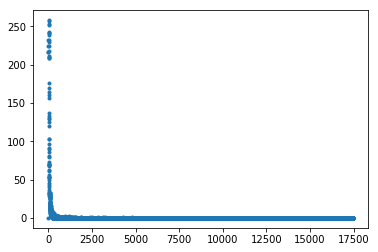

In [93]:
plt.plot(Nk,'.')

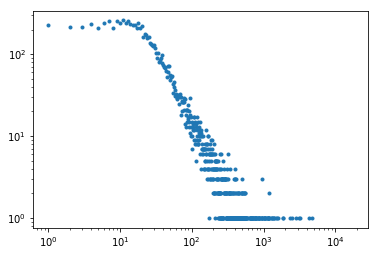

In [97]:
plt.loglog(Nk,'.')

## Part 4: Linear regression

So now it's time for fun with standard linear regression. We'll get into that by asking the following question. 

> *Which pair of focus crimes have the the most similar temporal pattern across the week? (And which pair is most dissimilar).*

Below I list the focus-crimes for your convenience

In [ ]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

One way to answer this question is to plot the activity for all pairs of crimetypes as scatter plot per pair. One crime type on each axis, and where each point in the scatter corresponds to an hour of the week, and the number of crimes of crime-type 1 is on the $x$-axis and the number of crimes of crime-type 2 is on the $y$-axis. (So there will be 168 points in each scatterplot.)

If we look at 14 focus crimes that results in
$$\frac{14\times13}{2}=91$$

pairwise comparisons. So we can display them all in a $7$ by $13$ matrix of plots. You can use matplotlib's `subplot` to organize those plots. With $7$ across and $13$ down, you should be able to squeeze them all onto a single [a4](https://en.wikipedia.org/wiki/ISO_216#A_series) page.

*Exercise*:
> Create the 91 scatterplots.
> * Make sure to label each one with the two crime-types you're comparing so we can easily inspect visually.
> * Make sure that that you squeeze the subplots closely together so each plot can be as big as possible. 
> * Just inspecting this matrix, which crime-types look correlated and which one look like they're very different?

Next it's time for the linear regression. Janert writes about this on page 63-66.

Figuring out how to find the best fit is a nice little problem, and I'm in the mood to revisit how to solve it, so I'll actually derive the solution below. 

(***Important* public service announcement**: You don't really need to know how this is done, so the derivation *can safely be skipped*, and you can just jump to the final equations, and start your coding. But if you (like me), are in the mood for revisiting a cute little problem from the past, you might be entertained by the next few parts).

### Setting up the problem

Ok. So first, let's introduce some [nomenclature](https://www.merriam-webster.com/dictionary/nomenclature). We want to fit a line of the form $y = ax + b$, where $a$ is the slope and $b$ is the $y$-intercept. 

<img src="https://raw.githubusercontent.com/suneman/socialdataanalysis2019/master/files/sketch1.png" alt="drawing" width="650"/>

Here, the line is shown in red, and we've also given names to all our data. There are $N$ points, and point $i$ has coordinates $(x_i,y_i)$.

### So what is it we want to optimize?

Now we can think about how we actually implement the best possible fit. We won't just do something *ad hoc* like moving the line around until it looks good. Here, we want to use the power of math to make sure that we actually find the best fit. 

A promising concept to make the best fit something practical is the *residuals*. For some $x_i$, the residual is the difference between the actual value $y_i$ and the value of the line in that point $ax_i+b$. On the plot the differences look like this (with residuals illustrated in green)

<img src="https://raw.githubusercontent.com/suneman/socialdataanalysis2019/master/files/sketch3.png" alt="drawing" width="650"/>

Below the plot, I've also sketched the size of the residuals. (Note the connection of the little inset to DAOST Figure 3-5.)

**So if we can make the residuals as small as possible, we will find a good fit**. But how do we do that?

### The sum of squares
Basically the idea is that we want to minimize some function of all the residuals that takes into account their sizes. We can't just add them in a big sum, since they're both positive and negative. If we did that, we would end up with a small sum, as long as we had a roughly equal number of positive/negative residuals.

Another candidate for a function that you might come up with now (especially if you think like a programmer), involve minimizing the sum of absolute values of residuals. That might actually work well, but it's non-trivial to work with absolute values from the perspective of the mathematics ([plus there are other good reasons to follow a different route](https://math.stackexchange.com/questions/967883/why-get-the-sum-of-squares-instead-of-the-sum-of-absolute-values) as we do below).

In fact, a lovely way to make sure the residuals are positive, is to simply *square them*. Minimizing the sum of squares also minimizes the sum of absolute values. So now we're good to go. If we call the sum of squares $Q$, the thing we want to make as small as possible is

$$Q = \sum_{i=1}^N \left(y_i - (ax + b) \right)^2$$.

**But how the h#ll do we do that?** Is it time for gradient descent or some numerical optimization like that?

Most of the time, when we're finding optima of complicated functions, the answer is yes, but in this simple case, the answer is no. 

Because this is a beautiful and simple problem, we can find an analytical solution using relatively simple methods. (And the happy memory of learning about *that*, is why I felt like going over the solution today ... although I'm starting to regret it a bit ... since it's a lot of work explain all this 🥴🤪).

But there's no point in stopping now. So let's do it!

### Minimizing the sum of squares
How do we find the minimum of something without coding? Now, you have to think *all the way back* to when you did your high school math. (Ah, those were the days, right.)

And yes, you're right. $Q$ will be minimized at the values of $a$ and $b$ for which $\partial Q / \partial a = 0$ and $\partial Q / \partial b = 0$. So we can simply find those.

We start with the $y$-intecept, $b$. Now, we find that by setting the derivative wrt. $b$ equal to zero

$$
\frac{ \partial Q } {\partial b} = \sum_{i=1}^N -2 \left(y_i - b - ax_i\right)=
2\left(N b + a \sum_{i=1}^Nx_i - \sum_{i=1}^Ny_i\right) = 0.
$$

We can reorganize this to give us a nice interpretation of $b$

$$
\tag{1}
b = \langle y \rangle - a \langle x \rangle,
$$

where $\langle x \rangle = (1/N)\sum_i x_i$ is the mean value of the $x_i$ and $\langle y \rangle = (1/N)\sum_i x_i$ is the mean value of the $y_i$. 

**Equation (1) is what you will need later on**, but it's useless without an expression for the slope $a$, so let's find that.

This time we get

$$
\frac{ \partial Q } {\partial a} = \sum_{i=1}^N -2x_i \left(y_i - b - ax_i\right)=
\sum_{i=1}^N -2\left(x_iy_i - bx_i - ax_i^2\right) = 0.
$$

We now substitute our solution for $b$ into this equation to yield
$$
\sum_{i=1}^N \left( x_iy_i - x_i \langle y\rangle + ax_i\langle x \rangle -  a x_i^2   \right) = 0.
$$

And we can split this bad-boy into two sums to give us

$$
\sum_{i=1}^N \left( x_iy_i - x_i \langle y\rangle\right) - 
a\sum_{i=1}^N \left(x_i^2 - x_i\langle x \rangle \right) = 0,
$$

where we can isolate $a$ to give us a **final expression for the slope, shown below in Equation (2).**

$$
\tag{2}
a = \frac{\sum_{i=1}^N \left( x_iy_i - x_i \langle y\rangle\right)}{\sum_{i=1}^N \left(x_i^2 - x_i\langle x \rangle \right)}=
\frac{\sum_{i=1}^N \left( x_iy_i \right) - N \langle x\rangle\langle y\rangle }{\sum_{i=1}^N\left( x_i^2 \right) - N\langle x\rangle^2}.
$$
Aaaand we're done. 

***Important summary information:*** To use my ramblings above for something constructive, simply start by calculating Equation (2), then plug your answer into Equation (1) and you'll have the best fit line. That means we can now get going with the actual exercises.

*Exercise*:
> * Using the formulas we derived above (Equation 1 and 2), to calculate slopes for $a$ and $b$ in each case, and add a linear fit to each of the 91 scatterplots. (If you'd like, you can use a built package/function for fitting straight lines to check that everything is working as expected.)
> * (Optional) You can add even more information to this plot by coloring each point according to its hour of the week. So create a gradient going from one color to another, and color each point according to the gradient. (So let's say your two colors are red and blue, then the Sunday, midnight to 1am bin will be red and the following Sunday, 11pm - midnight bin will be blue).

### Goodness of fit as a measure of correlation

But the question we started with was "Which pair of focus crimes have the the most similar temporal pattern across the week?". We haven't really answered that yet. So let's calculate one last thing: $R^2$. You probably also remember this one. 

Basically $R^2$ is a measurea of how good a linear fit is. I think I've derived enough things from scratch today, so I'll spare you that, instead [**go read about $R^2$ on wikipedia**](https://en.wikipedia.org/wiki/Coefficient_of_determination). 

*Exercise:* 
> * Write a little function to calculate $R^2$ alongside each linear fit.
> * According to your fits and associated measure of $R^2$, which pair of crimes have the most similar temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?
> * According to your fits and associated measure of $R^2$, which pair of crimes have the most **dis**similar temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?
> * Explain the connection between $R^2$ and the (Pearson correlation coefficient)[https://en.wikipedia.org/wiki/Pearson_correlation_coefficient].
> * And speaking of correlations. In your words, explain the [Spearman correlation](https://en.wikipedia.org/wiki/Spearman's_rank_correlation_coefficient)? How is it different for the Pearson correlation?